# IRIS CLASSIFICATION

### TASK-1:
    
    Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
    measurements. Now assume that you have the measurements of the iris flowers according to
    their species, and here your task is to train a machine learning model that can learn from the
    measurements of the iris species and classify them.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
filepath="Iris_data.csv"

In [21]:
df = pd.read_csv(filepath)

In [22]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# TRANSFORMING DATA

In [23]:
df.drop("Id",axis=1,inplace=True)

In [24]:
new_column_names = {"SepalLengthCm": "sepal_length",
                    "SepalWidthCm": "sepal_width",
                    "PetalLengthCm": "petal_length",
                    "PetalWidthCm": "petal_width",
                    "Species": "target"}

# Rename the columns of the DataFrame using the dictionary
df = df.rename(columns=new_column_names)

In [25]:
#finding the unique targets
df.target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [26]:
#changing target to numerical data
df['target'] = df['target'].replace({'Iris-setosa':0, 'Iris-versicolor':1,  'Iris-virginica':2})

In [27]:
#displaying the transformed data
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# EXPLORATORY DATA ANALYSIS

In [29]:
#getting idea of what this data contains
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [30]:
#count of unique targets
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

## PAIR PLOT

>>to visualize the relationships between the variables>>


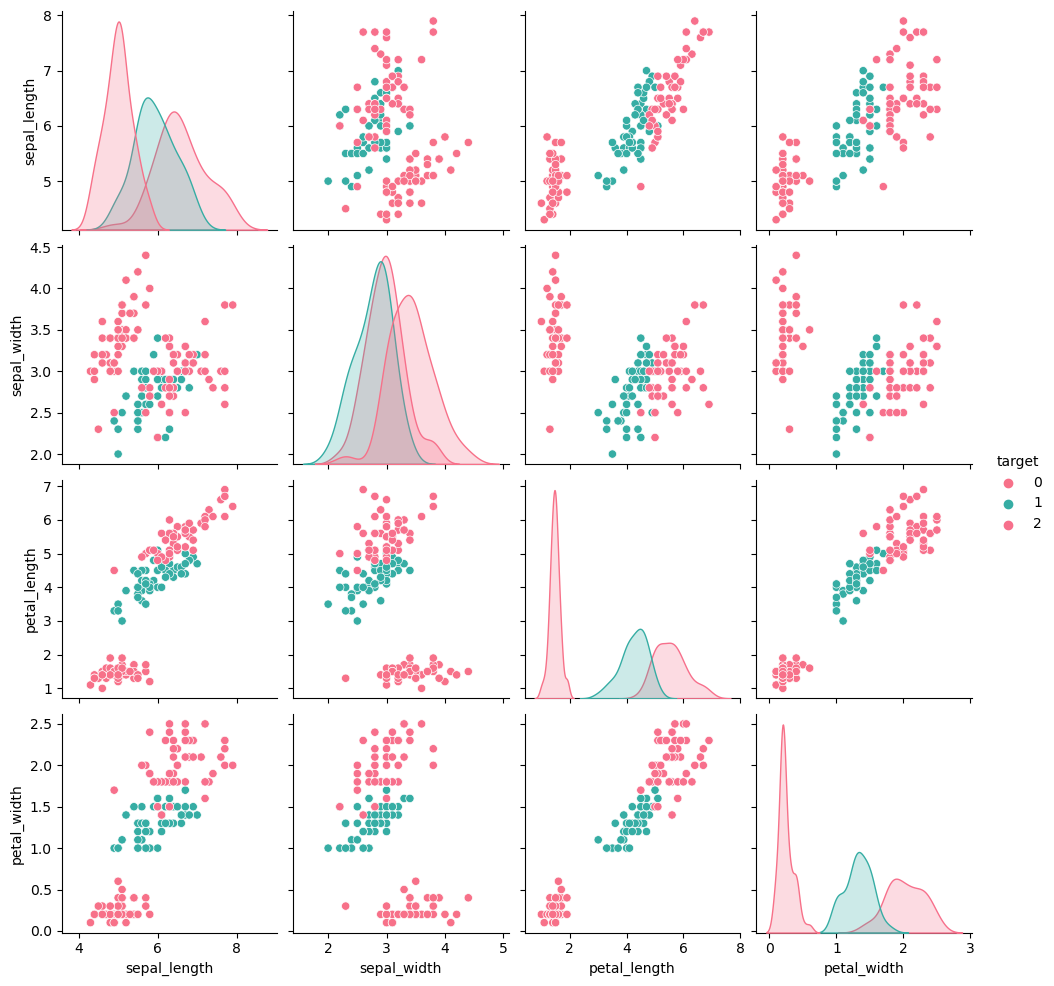

In [31]:
# have created a pairplot to visualize the relationships between the variables

sns.pairplot(data=df, hue="target", palette="husl");
print(">>to visualize the relationships between the variables>>")

## BOX-PLOT

>>this is done to find the outliers>>


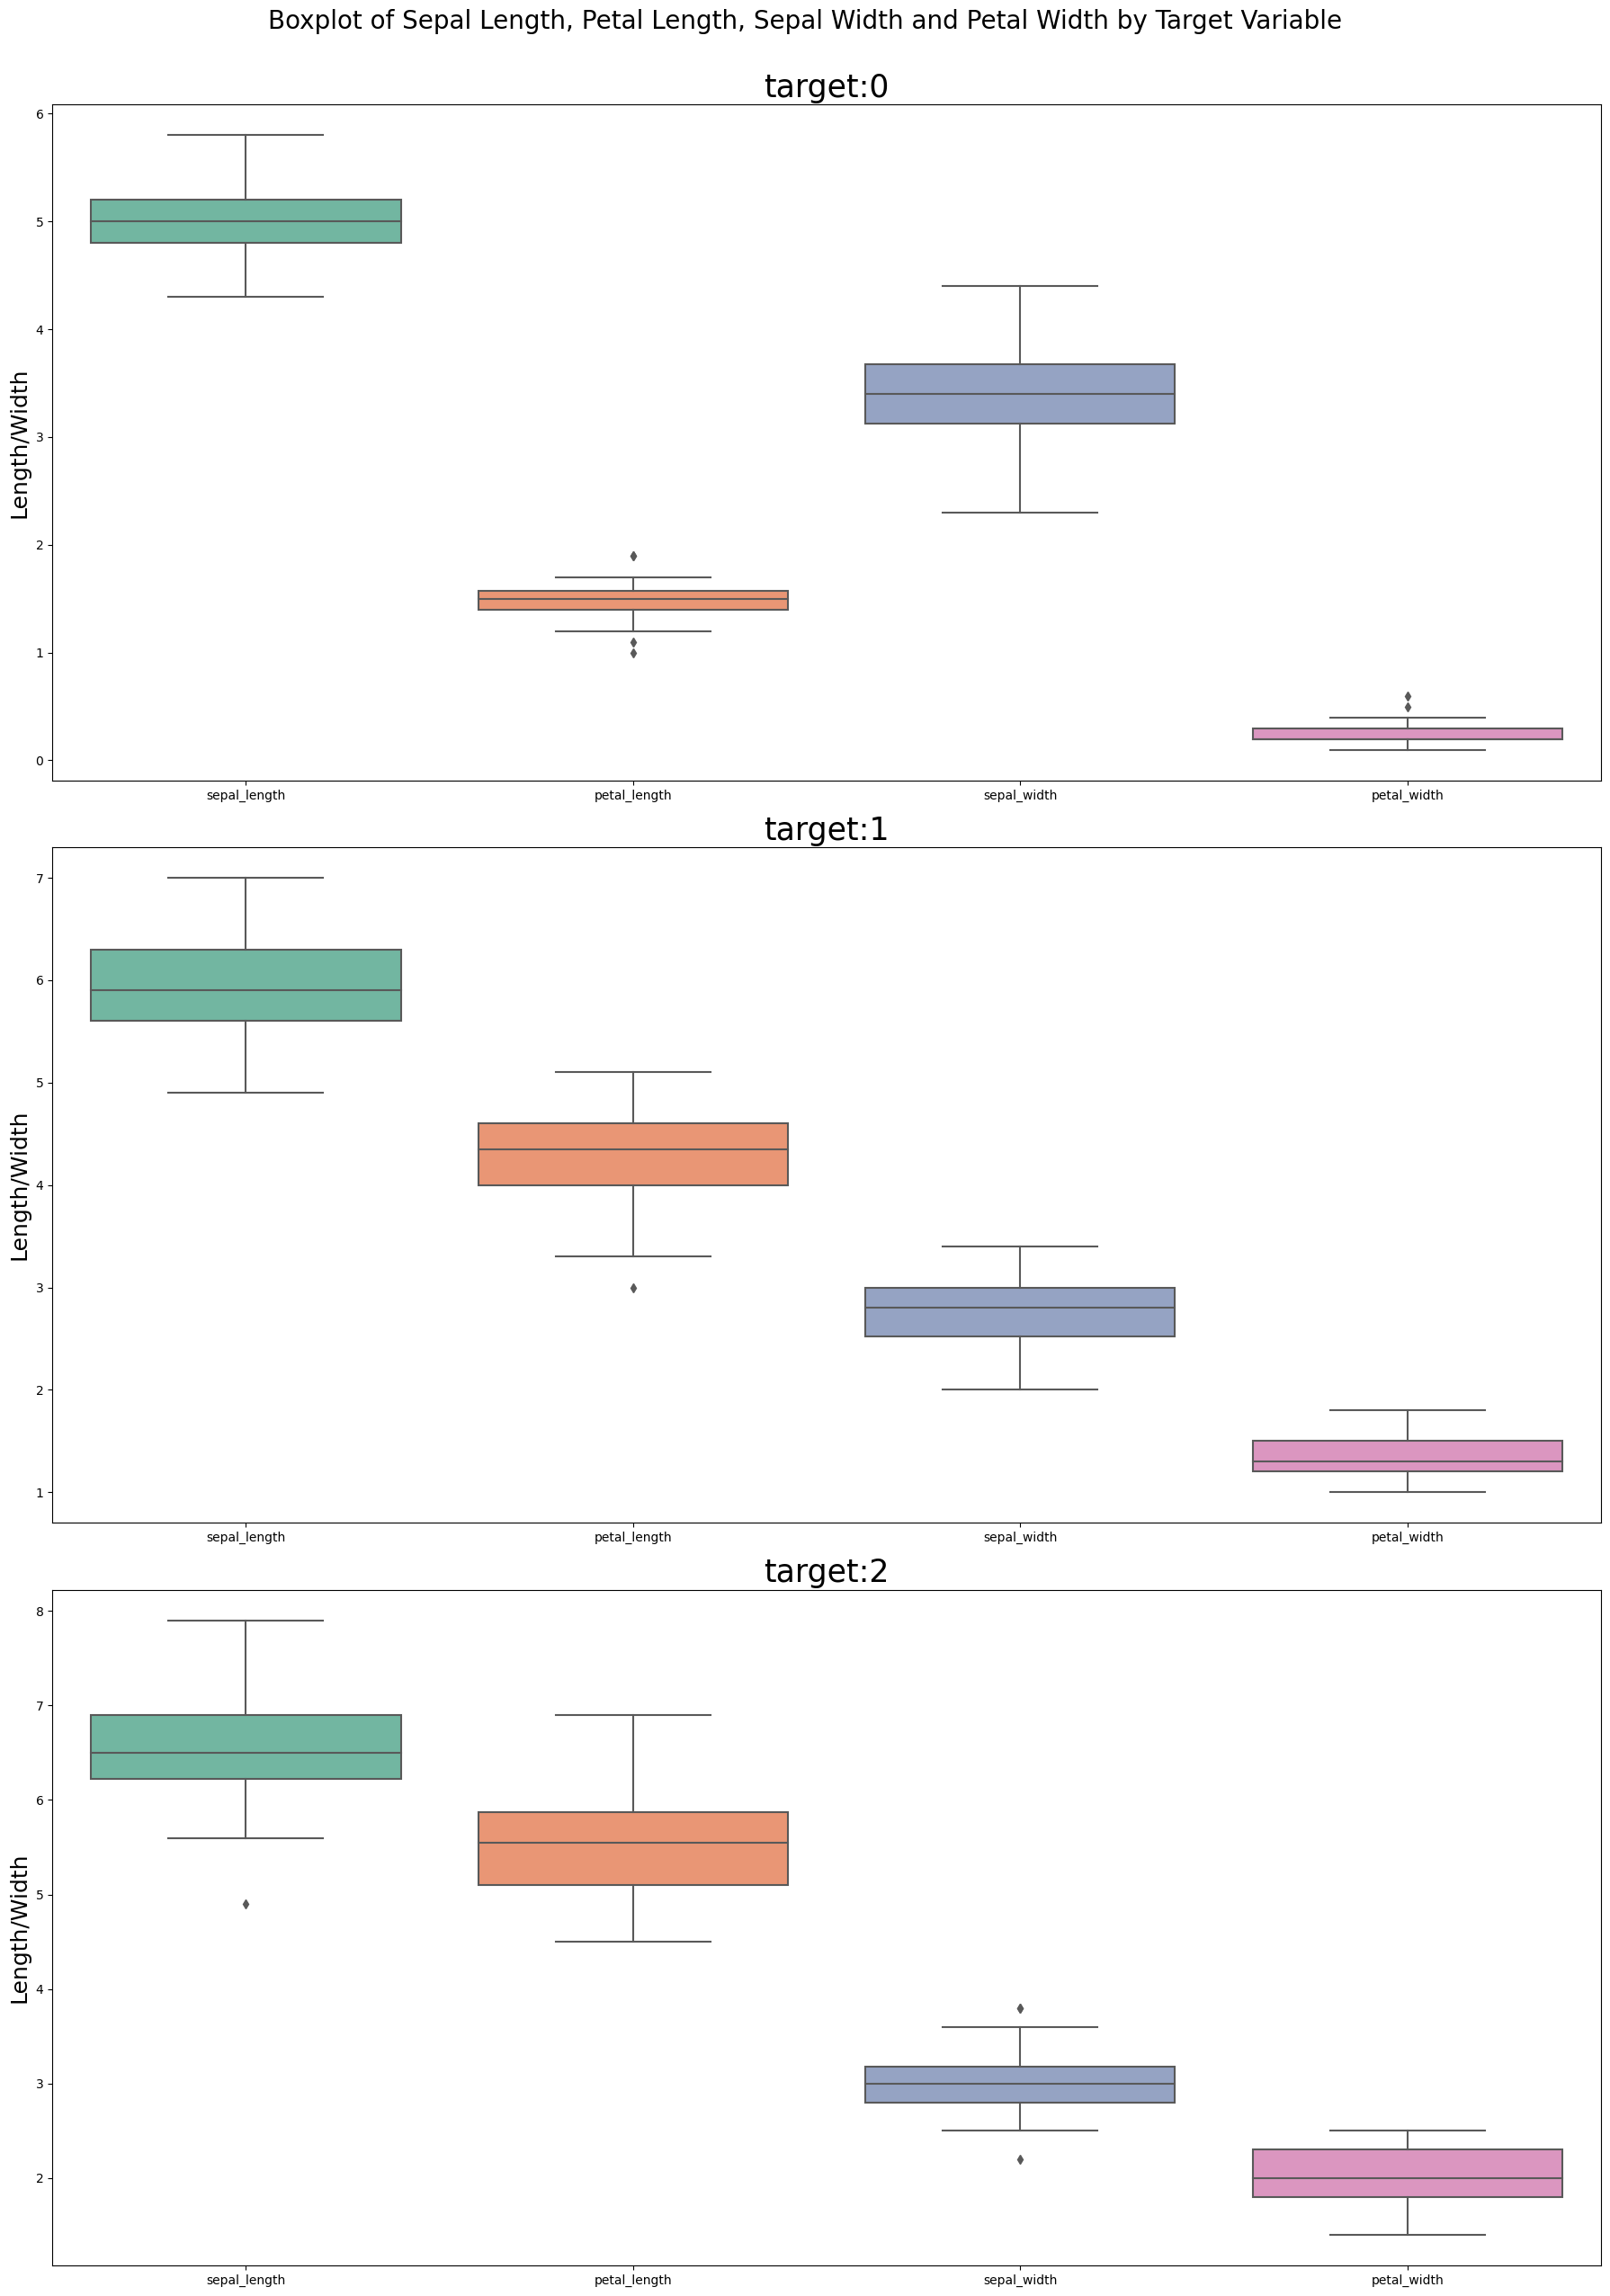

In [32]:
# Set up the subplots

fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(18, 26))
targets = df['target'].unique()
sns.set_palette("Set2")

# Create a box plot for each target variable

for i, target in enumerate(targets):
    df1 = df[df['target'] == target][['sepal_length', 'petal_length', 'sepal_width', 'petal_width']]
    sns.boxplot(data=df1, ax=axs[i])
    axs[i].set_title("target:"+str(target), fontsize=25)
    axs[i].set_xlabel("\n",fontsize=18)
    axs[i].set_ylabel("Length/Width",fontsize=18)

plt.suptitle("Boxplot of Sepal Length, Petal Length, Sepal Width and Petal Width by Target Variable\n\n", fontsize=20)
print('>>this is done to find the outliers>>')

#display the plot

plt.tight_layout()
plt.show()


## HEAT MAP

>>to show the correlation between the variables>>


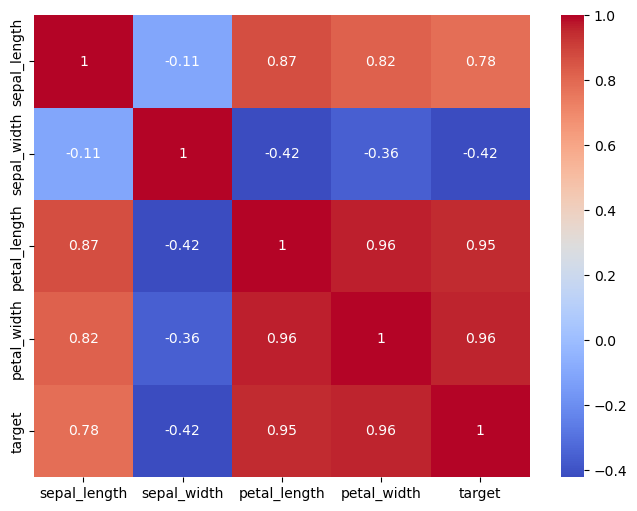

In [33]:
# have created a heatmap to show the correlation between the variables

plt.figure(figsize=(8, 6))
sns.heatmap(data=df.corr(), cmap="coolwarm", annot=True)
print(">>to show the correlation between the variables>>")
plt.show();

## SCATTER PLOT

>>to show the relationship between sepal length and petal width by target>>


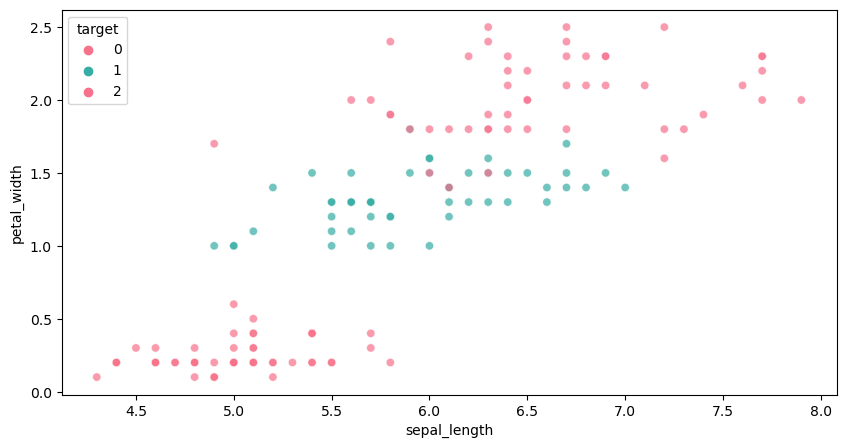

In [34]:
# have created a scatter plot to show the relationship between sepal length and petal width by target

plt.figure(figsize=(10, 5))
sns.scatterplot(x="sepal_length", y="petal_width", data=df, hue="target", palette="husl", alpha=0.7)
print(">>to show the relationship between sepal length and petal width by target>>")

## SWARM PLOT

>>to show the distribution of petal width by target>>


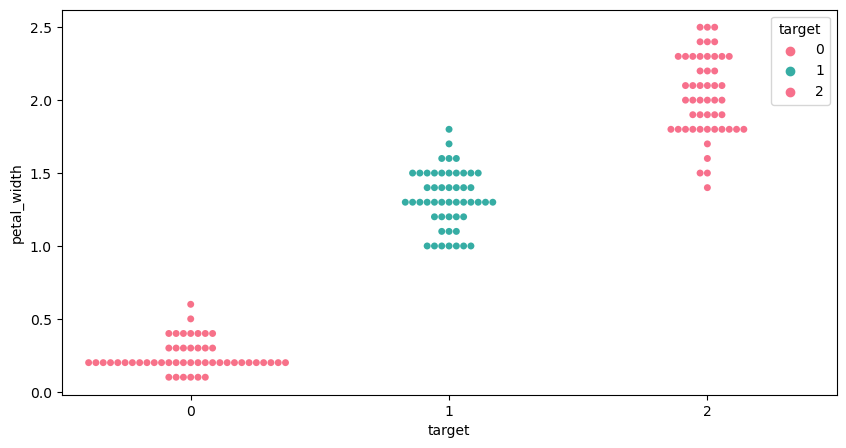

In [35]:
# have created a swarm plot to show the distribution of petal width by target

plt.figure(figsize=(10, 5))
sns.swarmplot(x="target", y="petal_width", data=df,hue="target", palette="husl",size=5)
print(">>to show the distribution of petal width by target>>")
plt.show();

# MODEL SELECTION

#### ENSEMBLE LEARNING TECHNIQUE WITH DECISION TREE CLASSIFIER

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

X = df[["sepal_length","sepal_width","petal_length","petal_width"]]
y = df[["target"]]
y = np.ravel(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create three different decision tree classifiers with different hyperparameters
clf1 = DecisionTreeClassifier(max_depth=3)
clf2 = DecisionTreeClassifier(max_depth=5)
clf3 = DecisionTreeClassifier(max_depth=7)

# Create an ensemble of the three classifiers
ensemble_clf = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2), ('clf3', clf3)], voting='hard')

# Fit the ensemble classifier on the training data
ensemble_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = ensemble_clf.predict(X_test)

# Calculate the accuracy of the ensemble classifier
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy*100)


Accuracy: 97.33333333333334


# CONCLUSION:

### The ensemble learning model using three decision tree classifiers achieved an accuracy of "97.34%" in predicting the iris species based on its features. This indicates that the model was effective in making accurate predictions and demonstrates the power of ensemble learning for improving machine learning accuracy.

# ---------------------------------------------------------------------------------------------------------------